# Visualization with hierarchical clustering and t-SNE
In this chapter, you'll learn about two unsupervised learning techniques for data visualization, hierarchical clustering and t-SNE. Hierarchical clustering merges the data samples into ever-coarser clusters, yielding a tree visualization of the resulting cluster hierarchy. t-SNE maps the data samples into 2d space so that the proximity of the samples to one another can be visualized.

In [45]:
from IPython.display import HTML, Image
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Visualizing hierarchies

In [2]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/01-Visualizing_hierarchies.mp4" type="video/mp4">
</video>

## Visualisations communicate insight
- "t-SNE" : Creates a 2D map of a dataset (later)
- "Hierarchical clustering" (this video)

## A hierarchy of groups
- Groups of living things can form a hierarchy
- Clusters are contained in one another

![][hierarchy]

## Eurovision scoring dataset
- Countries gave scores to songs performed at the Eurovision 2016
- 2D array of scores
- Rows are countries, columns are songs

![][Eurovision]

## Hierarchical clustering of voting countries

![][Hierarchical_clustering]

## Hierarchical clustering
- Every country begins in a separate cluster
- At each step, the two closest clusters are merged
- Continue until all countries in a single cluster
- This is “agglomerative” hierarchical clustering

## The dendrogram of a hierarchical clustering
- Read from the bottom up
- Vertical lines represent clusters

![][dendrogram]

[hierarchy]: _Docs/hierarchy.png
[Eurovision]: _Docs/Eurovision.png
[Hierarchical_clustering]: _Docs/Hierarchical_clustering.png
[dendrogram]: _Docs/dendrogram.png

### How many merges?
If there are 5 data samples, how many merge operations will occur in a hierarchical clustering? To help answer this question, think back to the video, in which Ben walked through an example of hierarchical clustering using 6 countries. How many merge operations did that example have?

**Possible Answers**
- [x] 4 merges.
- [ ] 5 merges.
- [ ] This can't be known in advance.


### Hierarchical clustering of the grain data
In the video, you learned that the SciPy `linkage()` function performs hierarchical clustering on an array of samples. Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result. A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.

In [3]:
grains = np.array(pd.read_csv('../_datasets/Grains/seeds.csv', header=None))
samples = grains[:,:-1]
varieties = ['Kama wheat' if e == 1 else 'Rosa wheat' if e ==2 else 'Canadian wheat'  for e in grains[:,-1] ]

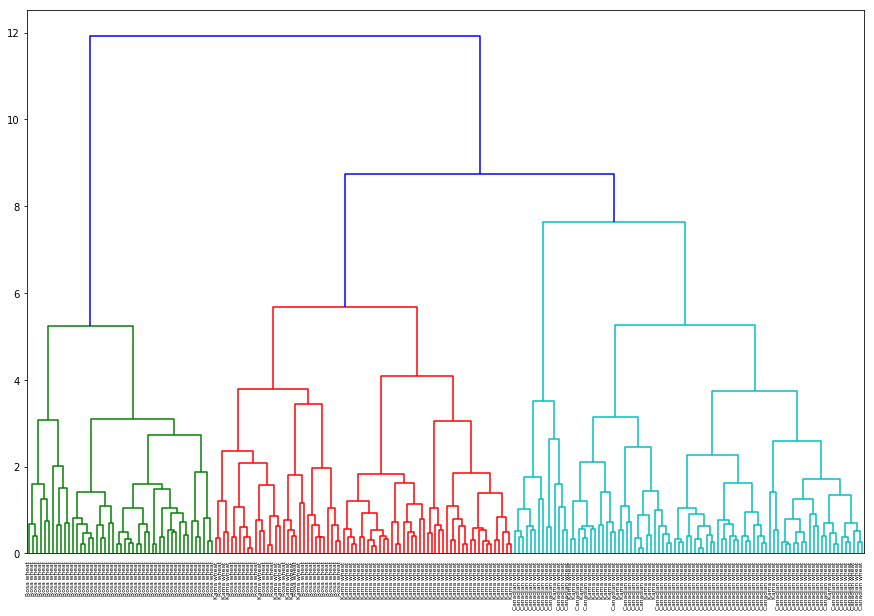

In [4]:
plt.figure(figsize=(15,10))
# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

Dendrograms are a great way to illustrate the arrangement of the clusters produced by hierarchical clustering.

### Hierarchies of stocks
In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements `movements`, where the rows correspond to companies, and a list of the company names `companies`. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the `normalize()` function from `sklearn.preprocessing` instead of `Normalizer`.

`linkage` and `dendrogram` have already been imported from `sklearn.cluster.hierarchy`, and PyPlot has been imported as `plt`.

In [60]:
stock_price_movements = pd.read_csv('../_datasets/company-stock-movements-2010-2015-incl.csv')
stock_price_movements.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [ ]:
movements = np.array(stock_price_movements.drop(stock_price_movements.columns[0], axis=1))
companies = stock_price_movements[stock_price_movements.columns[0]].to_list()

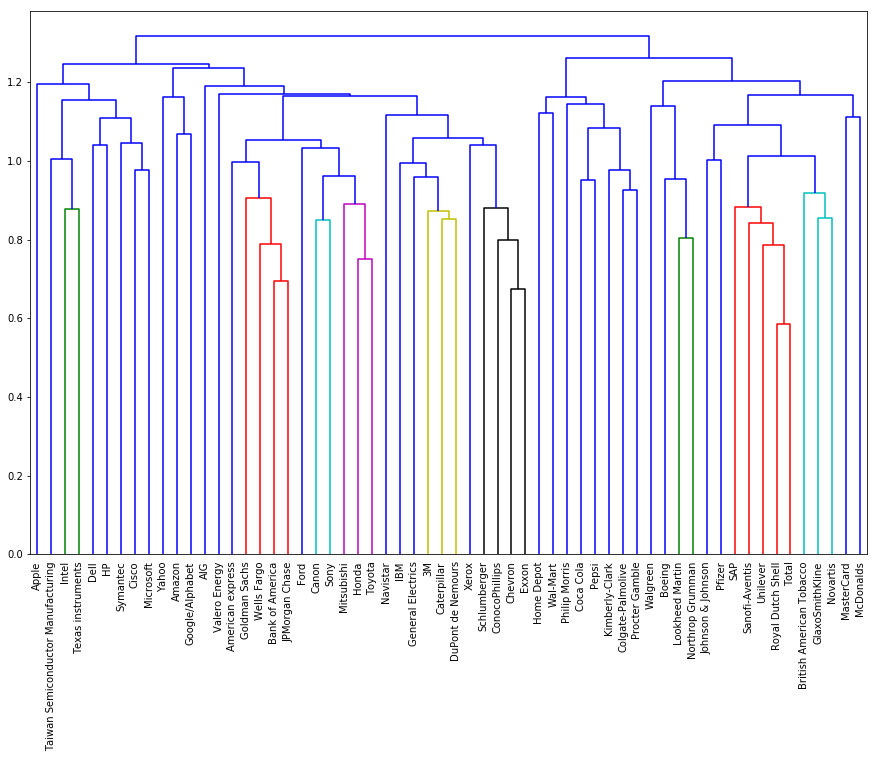

In [6]:
plt.figure(figsize=(15,10))

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

You can produce great visualizations such as this with hierarchical clustering, but it can be used for more than just visualizations.

## Cluster labels in hierarchical clustering

In [7]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/02-Cluster_labels_in_hierarchical_clustering.mp4" type="video/mp4">
</video>

## Cluster labels in hierarchical clustering
- Not only a visualisation tool!
- Cluster labels at any intermediate stage can be recovered
- For use in e.g. cross-tabulations

## Intermediate clusterings & height on dendrogram
- E.g. at height 15: Bulgaria, Cyprus, Greece are one cluster
- Russia and Moldova are another
- Armenia in a cluster on its own
![][height_on_dendrogram]

## Dendrograms show cluster distances
- Height on dendrogram = distance between merging clusters
- E.g. clusters with only Cyprus and Greece had distance approx. 6
- This new cluster distance approx. 12 from cluster with only Bulgaria

![][cluster_distance]

## Intermediate clusterings & height on dendrogram
- Height on dendrogram specifies max. distance between merging clusters
- Don't merge clusters further apart than this (e.g. 15)

## Distance between clusters
- Defined by a "linkage method"
- Specified via method parameter, e.g. `linkage(samples, method="complete")`
- In "complete" linkage: distance between clusters is max. distance between their samples
- Different linkage method, different hierarchical clustering!

## Extracting cluster labels
- Use the `fcluster` method
- Returns a NumPy array of cluster labels

[height_on_dendrogram]: _Docs/height_on_dendrogram.png
[cluster_distance]: _Docs/cluster_distance.png

### Which clusters are closest?
In the video, you learned that the linkage method defines how the distance between clusters is measured. *In complete* linkage, **the distance between clusters is the distance between the furthest points of the clusters**. In *single* linkage, **the distance between clusters is the distance between the closest points of the clusters.**

Consider the three clusters in the diagram. Which of the following statements are true?

> A. In single linkage, cluster 3 is the closest to cluster 2.

> B. In complete linkage, cluster 1 is the closest to cluster 2.

![][clusters_closest]

[clusters_closest]: _Docs/clusters_closest.png

### Different linkage, different hierarchical clustering!
In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using `'complete'` linkage. Now, perform a hierarchical clustering of the voting countries with `'single'` linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

You are given an array samples. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list `country_names` gives the name of each voting country. This dataset was obtained from [Eurovision][1].

[1]: http://www.eurovision.tv/page/results

In [20]:
eurovision = pd.read_csv('../_datasets/eurovision-2016.csv', usecols=['From country','Televote Points']).fillna(0)
#eurovision = eurovision.drop(columns= eurovision.columns[-3:-2]).reset_index()
eurovision.head()

,From country,Televote Points
0,Albania,0.0
1,Albania,0.0
2,Albania,0.0
3,Albania,0.0
4,Albania,1.0


In [21]:
eurovision['idx'] = eurovision.groupby('From country').cumcount()
eurovision = eurovision.pivot(index='From country', columns='idx', values='Televote Points').fillna(12)
eurovision.head()

idx,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
From country,,,,,,,,,,,,,,,,,,,,,
Albania,0.0,0.0,0.0,0.0,1.0,10.0,0.0,8.0,3.0,0.0,...,0.0,7.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,2.0
Armenia,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,...,0.0,12.0,0.0,0.0,10.0,5.0,8.0,4.0,0.0,12.0
Australia,12.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,5.0,2.0,0.0,8.0,6.0,0.0,3.0,4.0,0.0,12.0
Austria,0.0,0.0,6.0,0.0,0.0,0.0,0.0,5.0,7.0,2.0,...,0.0,8.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,12.0
Azerbaijan,0.0,0.0,0.0,7.0,0.0,6.0,8.0,0.0,0.0,4.0,...,12.0,0.0,0.0,10.0,5.0,1.0,0.0,0.0,0.0,12.0


In [22]:
samples = eurovision.values
country_names = eurovision.index.values.tolist()

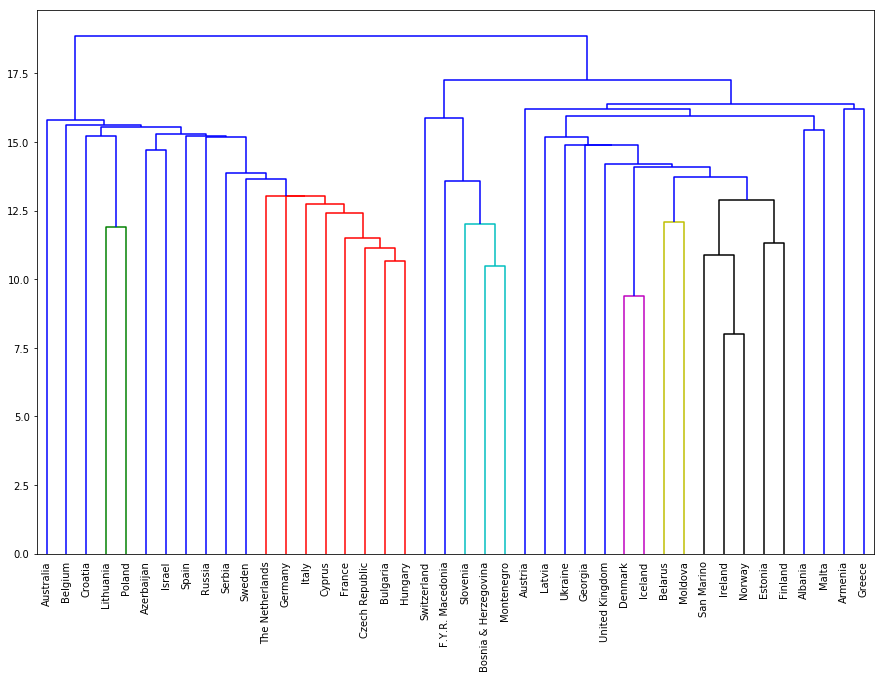

In [23]:
plt.figure(figsize=(15,10))

# Calculate the linkage: mergings
mergings = linkage(samples,method='single')

# Plot the dendrogram
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

### Intermediate clusterings
Displayed below is the dendrogram for the hierarchical clustering of the grain samples that you computed earlier. If the hierarchical clustering were stopped at height 8 on the dendrogram, how many clusters would there be?

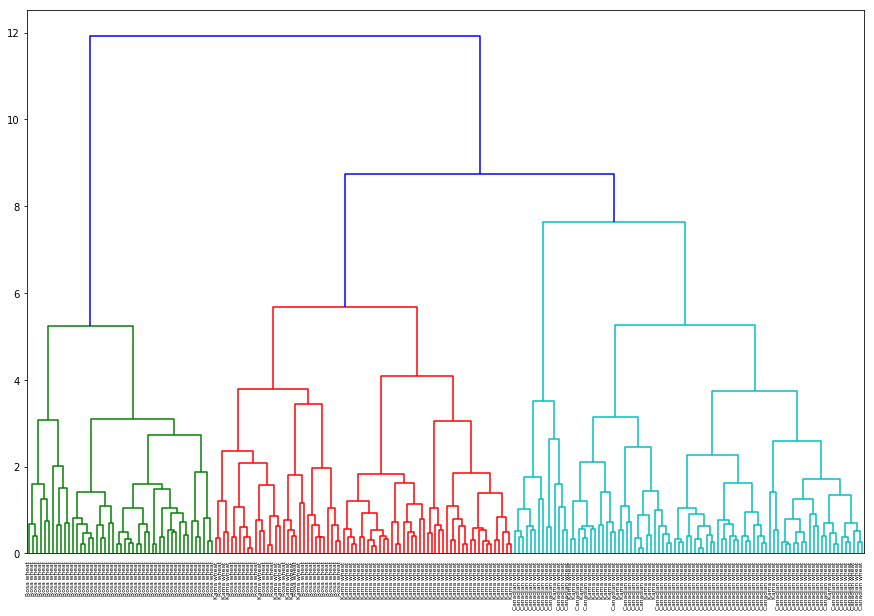

In [40]:
samples = grains[:,:-1]
varieties = ['Kama wheat' if e == 1 else 'Rosa wheat' if e ==2 else 'Canadian wheat'  for e in grains[:,-1] ]

plt.figure(figsize=(15,10))
# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

**Possible Answers**
- [ ] 1.
- [X] 3.
- [ ] As many as there were at the beginning.

### Extracting the cluster labels
In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the `fcluster()` function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

The hierarchical clustering has already been performed and `mergings` is the result of the `linkage()` function. The list `varieties` gives the variety of each grain sample.

In [42]:
# Use fcluster to extract labels: labels
labels = fcluster(mergings, 8, criterion='distance') 

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
1,0,0,47
2,0,52,23
3,70,18,0


you've now mastered the fundamentals of k-Means and agglomerative hierarchical clustering. Next, you'll learn about t-SNE, which is a powerful tool for visualizing high dimensional data.

## t-SNE for 2-dimensional maps

In [43]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/03-t-SNE_for_2-dimensional_maps.mp4" type="video/mp4">
</video>

### t-SNE for 2-dimensional maps
- t-SNE = “t-distributed stochastic neighbor embedding”
- Maps samples to 2D space (or 3D)
- Map approximately preserves nearness of samples
- Great for inspecting datasets

### t-SNE has only fit_transform()
- Has a `fit_transform()` method
- Simultaneously fits the model and transforms the data
- Has no separate `fit()` or `transform()` methods
- Can’t extend the map to include new data samples
- Must start over each time!

### t-SNE learning rate
- Choose learning rate for the dataset
- Wrong choice: points bunch together
- Try values between 50 and 200

### Different every time
- Axes of a t-SNE plot do not have any interpretable meaning.
- t-SNE features are different every time its applied
- Piedmont wines, 3 runs, 3 different scatter plots!
- … however: The wine varieties (=colors) have same position relative to one another

### t-SNE visualization of grain dataset
In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array `samples` of grain samples and a list `variety_numbers` giving the variety number of each grain sample.

In [48]:
samples = grains[:,:-1]
variety_numbers = grains[:,-1]

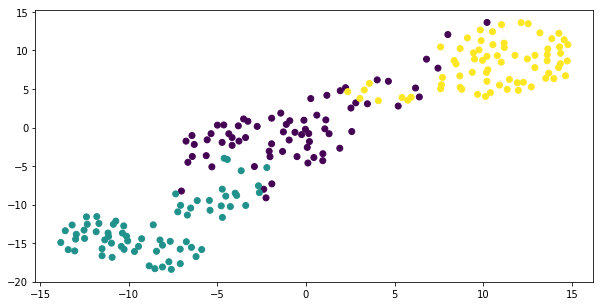

In [59]:
plt.figure(figsize=(10,5))

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=variety_numbers)
plt.show()

Excellent! As you can see, the t-SNE visualization manages to separate the 3 varieties of grain samples.

### A t-SNE map of the stock market
**t-SNE provides great visualizations when the individual samples can be labeled**. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array `normalized_movements` (these have already been normalized for you). The list `companies` gives the name of each company. PyPlot (`plt`) has been imported for you.

In [61]:
stock_price_movements = pd.read_csv('../_datasets/company-stock-movements-2010-2015-incl.csv')
stock_price_movements.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [64]:
movements = np.array(stock_price_movements.drop(stock_price_movements.columns[0], axis=1))
companies = stock_price_movements[stock_price_movements.columns[0]].to_list()
print(companies)

['Apple', 'AIG', 'Amazon', 'American express', 'Boeing', 'Bank of America', 'British American Tobacco', 'Canon', 'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco', 'Chevron', 'DuPont de Nemours', 'Dell', 'Ford', 'General Electrics', 'Google/Alphabet', 'Goldman Sachs', 'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel', 'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark', 'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M', 'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman', 'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris', 'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony', 'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total', 'Taiwan Semiconductor Manufacturing', 'Texas instruments', 'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart', 'Exxon', 'Xerox', 'Yahoo']


In [68]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)
normalized_movements

array([[ 0.00302051, -0.00114574, -0.01775851, ..., -0.02791349,
         0.00437463, -0.10202026],
       [-0.02599391, -0.02639998, -0.00852927, ..., -0.00162466,
        -0.01624623,  0.02680614],
       [-0.02208986,  0.01184398, -0.02208986, ...,  0.04502568,
        -0.01654394,  0.03515588],
       ...,
       [ 0.01981027,  0.01059598,  0.02626006, ..., -0.01197837,
         0.01842816,  0.02211388],
       [ 0.0200991 ,  0.00223323, -0.01786587, ..., -0.0066997 ,
         0.00446647, -0.0066997 ],
       [ 0.01796837,  0.00112314,  0.        , ..., -0.00673829,
         0.02919855,  0.01123007]])

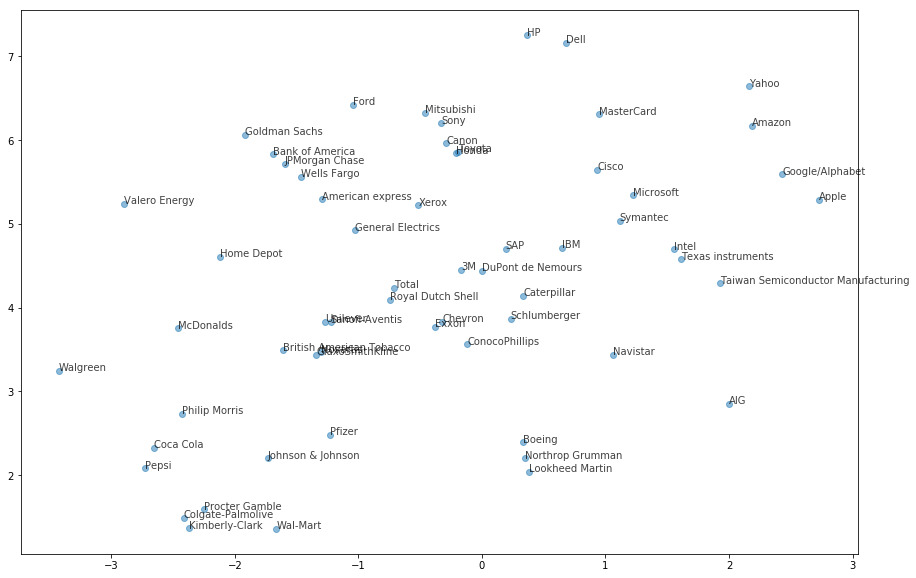

In [74]:
plt.figure(figsize=(15,10))

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=10, alpha=0.75)
plt.show()


It's visualizations such as this that make t-SNE such a powerful tool **for extracting quick insights from high dimensional data.**